In [70]:
# Add Matplotlib inline magic command
%matplotlib inline
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the csv files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the csv files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [8]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [10]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [11]:
# Get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [16]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [19]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [23]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [29]:
# Get the number of data points from the urban cities
sum(city_data_df["type"]=="Urban")

66

In [30]:
# Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [31]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [17]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [18]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [20]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [44]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display teh DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [46]:
# Create the Urban City DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [49]:
# Create the Suburban City DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [51]:
# Create the Rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [54]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [55]:
# Create the suburban ride count
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [56]:
# Create the rural ride count
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [60]:
# Get the average fare for each city in the urban cites
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [61]:
# Get the average fare for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [62]:
# Get the average fare for each city in the rural cities
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [64]:
# Get the average number of dirvers for each urban city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [65]:
# Get the average number of drivers for each suburban city
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [67]:
# Get the average number of drivers for each rural city
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

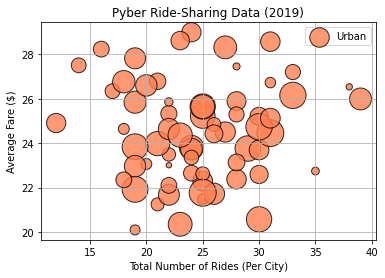

In [80]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='black', linewidth=1, alpha=0.8, label='Urban')
# Add axes labels
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
# Add a title
plt.title('Pyber Ride-Sharing Data (2019)')
# Add a grid
plt.grid(True)
# Add a legend
plt.legend()

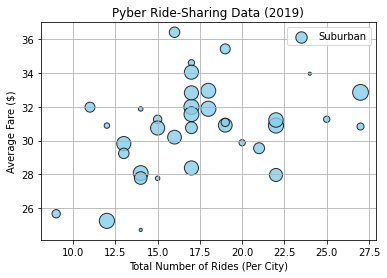

In [81]:
# Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c='skyblue', edgecolor='black', linewidth=1, alpha=0.8, label='Suburban')
# Add axes labels
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
# Add a title
plt.title('Pyber Ride-Sharing Data (2019)')
# Add a grid
plt.grid(True)
# Add a legend
plt.legend()

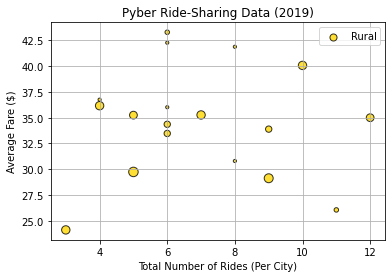

In [84]:
# Build the scatter plots for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor='black', linewidth=1, alpha=0.8, label='Rural')
# Add axes labels
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
# Add a title
plt.title('Pyber Ride-Sharing Data (2019)')
# Add a grid
plt.grid(True)
# Add a legend
plt.legend()

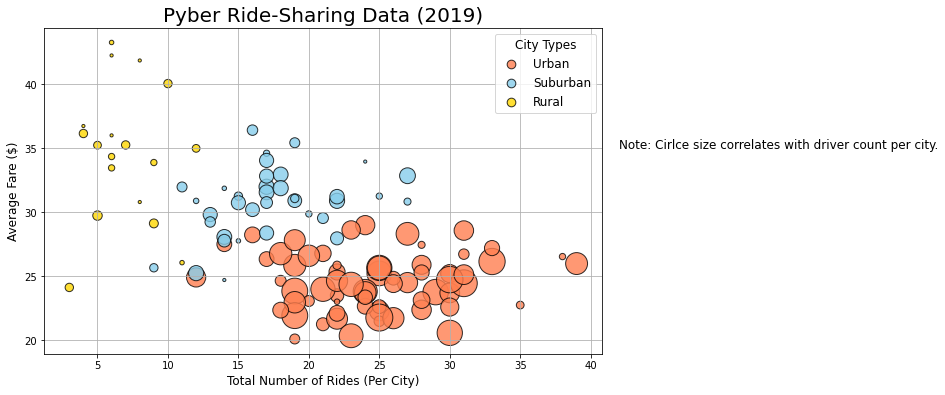

In [108]:
# Add the scatter charts for each type of city
# Build the scatter plots for urban cities
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='black', linewidth=1, alpha=0.8, label='Urban')

# Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c='skyblue', edgecolor='black', linewidth=1, alpha=0.8, label='Suburban')

# Build the scatter plots for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor='black', linewidth=1, alpha=0.8, label='Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride-Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
ply.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)
# Add a legend
lgnd = plt.legend(fontsize='12', mode='expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42, 35, "Note: Cirlce size correlates with driver count per city.", fontsize='12')

# Save the figure
plt.savefig("analysis/Fig1.png", bbox_inches="tight")

In [109]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [110]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [111]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [118]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [119]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [120]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [121]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [122]:
# Calculate the median of the ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [123]:
# Calculate the mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [124]:
suburban_ride_count.mode()

0    17
dtype: int64

In [125]:
rural_ride_count.mode()

0    6
dtype: int64

In [126]:
# Import Numpy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [130]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [136]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [137]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [138]:
# Get the fares for the urabn cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [140]:
# Calculate the measures of central tendency for the average for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is {median_urban_fares}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for the urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is 24.64.
The mode fare price for the urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [144]:
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [148]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban cities is ${mean_suburban_fares:.2f}.")
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural cities is ${mean_rural_fares:.2f}.")

The mean fare price for suburban cities is $30.97.
The mean fare price for rural cities is $34.62.


In [149]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [150]:
# Calculate the measures of central tendency of the driver counts for the urban cities
mean_urban_driver = np.mean(urban_drivers)
print(f"The mean of the driver counts for urban cities is {mean_urban_driver:2f}.")
median_urban_driver = np.median(urban_drivers)
print(f"The median of the driver counts for urban cities is {median_urban_driver}.")
mode_urban_driver = sts.mode(urban_drivers)
print(f"The mode of the driver counts for urban cities is {mode_urban_driver}.")

The mean of the driver counts for urban cities is 36.678154.
The median of the driver counts for urban cities is 37.0.
The mode of the driver counts for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [151]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [152]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean of the driver count for suburban cities is {mean_suburban_drivers:.2f}.")

The mean of the driver count for suburban cities is 13.71.


In [181]:
rural_drivers = rural_cities_df['driver_count']

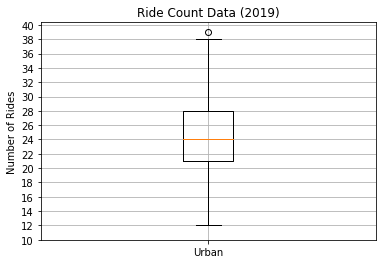

In [153]:
# Create a box and whisker plot for urban cities
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

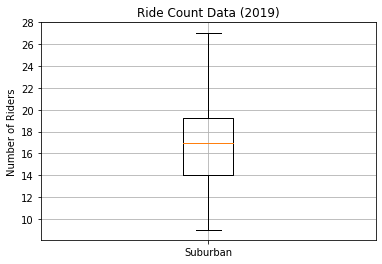

In [161]:
# Create a box and whisker plot for suburban cities
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Riders')
ax.grid()
ax.set_yticks(np.arange(10,30, step=2.0))
plt.show()

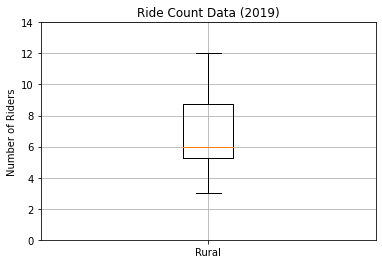

In [159]:
# Create a box and whisker plot for suburban cities
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Riders')
ax.grid()
ax.set_yticks(np.arange(0,16, step=2.0))
plt.show()

C:\Users\bdelu\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


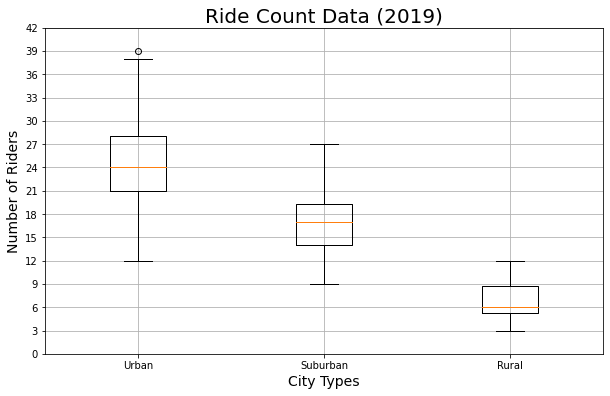

In [192]:
# Add all ride count box-and-whisker-plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Riders', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [166]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


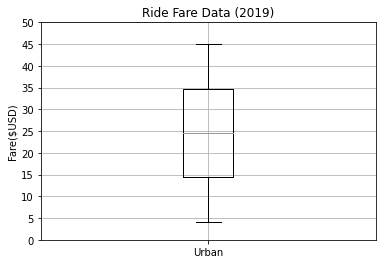

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [167]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

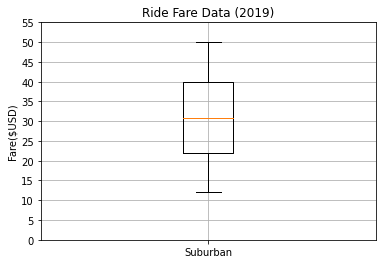

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [172]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

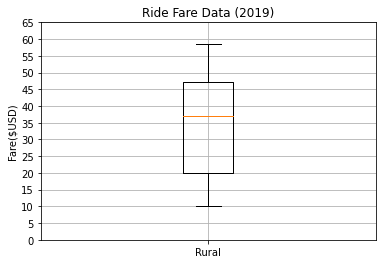

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [171]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 70, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

C:\Users\bdelu\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


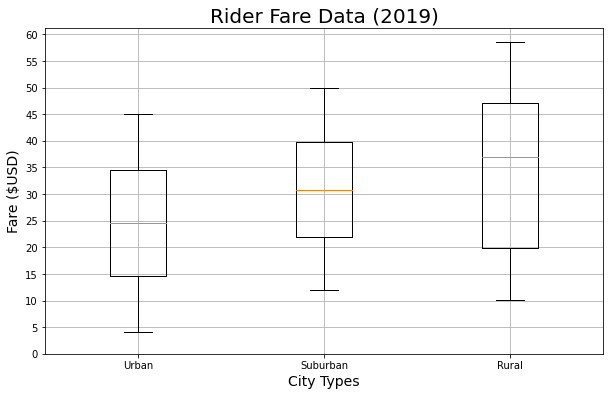

In [176]:
# Add all rider fare data to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
rider_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(rider_fare_data, labels=x_labels)
ax.set_title('Rider Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.grid()
ax.set_yticks(np.arange(0, 65, step=5.0))

# Save the figure and show
plt.savefig('analysis/Fig3.png')
plt.show()

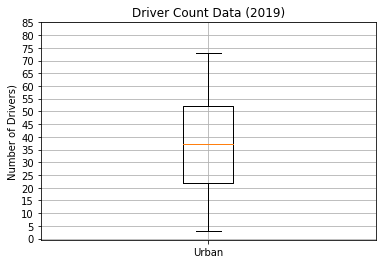

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [177]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

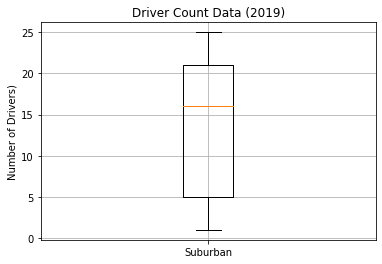

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [179]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

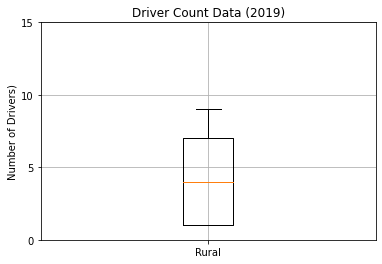

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [183]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 18, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

C:\Users\bdelu\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


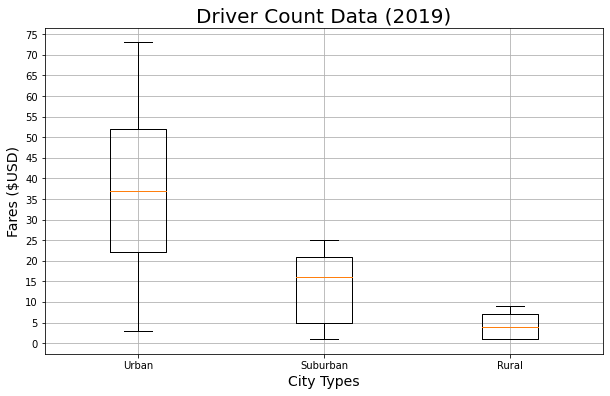

In [191]:
# Add all driver count box-and-whisker-plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Fares ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig4.png")
plt.show()

In [193]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [195]:
# Get the sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [196]:
# Calculate the percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

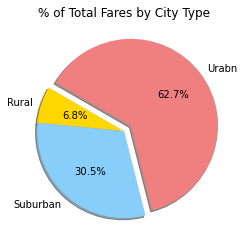

In [200]:
# Build the percentage of fares by city type pie chart
plt.pie(type_percents, labels=["Rural", "Suburban", "Urabn"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

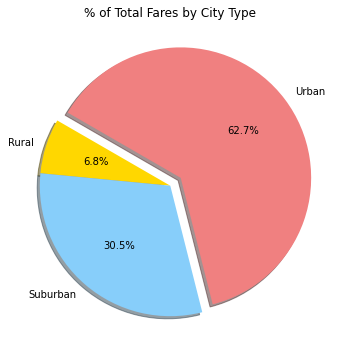

In [201]:
# Import mpl to change teh plot configurations using rcParams
import matplotlib as mpl
# Build pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14
# Save the figure
plt.savefig('analysis/Fig5.png')
plt.show()

In [204]:
# Get the sum of rides for each city type
pyber_data_df.groupby(['type']).count()['ride_id']


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [205]:
# Get the sum of all ride for all cities
pyber_data_df['ride_id'].count()

2375

In [206]:
# Calculate the percentage of rides for each city type
ride_percents = 100 * pyber_data_df.groupby(['type']).count()['ride_id'] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

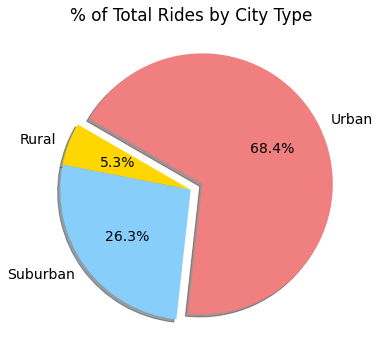

In [207]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl
# Build pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14
# Save the figure
plt.savefig('analysis/Fig6.png')
plt.show()

In [210]:
# Get the sum of drivers for each city
city_data_df.groupby(['type']).sum()['driver_count']

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [211]:
# Get the total sum of all drivers
city_data_df['driver_count'].sum()

2973

In [212]:
# Calculate the percentage of drivers for each city type
drivers_percent = 100 * city_data_df.groupby(['type']).sum()['driver_count'] / city_data_df['driver_count'].sum()
drivers_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

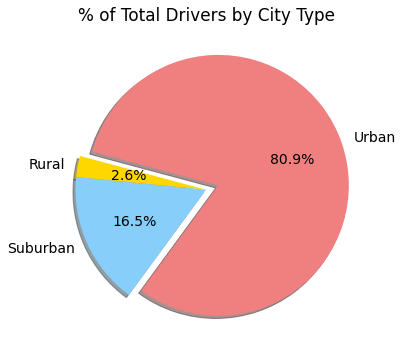

In [215]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl
# Build pie chart
plt.subplots(figsize=(10,6))
plt.pie(drivers_percent,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14
# Save the figure
plt.savefig('analysis/Fig7.png')
plt.show()